In [102]:
import pandas as pd
import numpy as np
import re
import string
import nltk

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df = pd.read_csv("C:/Users/sathi/Downloads/all_tickets_processed_improved_v3.csv")

df.head()

,Document,Topic_group
0,connection with icon icon dear please setup ic...,Hardware
1,work experience user work experience user hi w...,Access
2,requesting for meeting requesting meeting hi p...,Hardware
3,reset passwords for external accounts re expir...,Access
4,mail verification warning hi has got attached ...,Miscellaneous


In [106]:
print(df.columns)
df.head()

Index(['Document', 'Topic_group'], dtype='object')


,Document,Topic_group
0,connection with icon icon dear please setup ic...,Hardware
1,work experience user work experience user hi w...,Access
2,requesting for meeting requesting meeting hi p...,Hardware
3,reset passwords for external accounts re expir...,Access
4,mail verification warning hi has got attached ...,Miscellaneous


In [108]:
df.columns = df.columns.str.strip()

In [110]:
df = df.dropna(subset=["Document", "Topic_group"])
print(df.shape)

(3805, 2)


In [130]:
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"\d+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = text.split()
    words = [w for w in words if w not in stop_words and len(w) > 2]
    return " ".join(words)

df["cleaned_text"] = df["Document"].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sathi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [114]:
X = df["cleaned_text"]
y = df["Topic_group"].astype(str)

print("Number of classes:", y.nunique())
print(y.value_counts())

Number of classes: 8
Topic_group
HR Support               900
Hardware                 746
Access                   660
Miscellaneous            581
Storage                  308
Purchase                 306
Internal Project         191
Administrative rights    113
Name: count, dtype: int64


In [116]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [118]:
model = Pipeline([
    ("tfidf", TfidfVectorizer(
        max_features=20000,
        ngram_range=(1,2),      # Unigrams + Bigrams
        min_df=2,
        max_df=0.95
    )),
    ("clf", LinearSVC())
])

In [120]:
model.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.95, max_features=20000, min_df=2,
                                 ngram_range=(1, 2))),
                ('clf', LinearSVC())])

In [122]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.8068331143232589

Classification Report:

                       precision    recall  f1-score   support

               Access       0.83      0.77      0.80       132
Administrative rights       0.73      0.83      0.78        23
           HR Support       0.80      0.83      0.81       180
             Hardware       0.72      0.81      0.76       149
     Internal Project       0.97      0.76      0.85        38
        Miscellaneous       0.79      0.77      0.78       116
             Purchase       0.98      0.87      0.92        61
              Storage       0.84      0.85      0.85        62

             accuracy                           0.81       761
            macro avg       0.83      0.81      0.82       761
         weighted avg       0.81      0.81      0.81       761



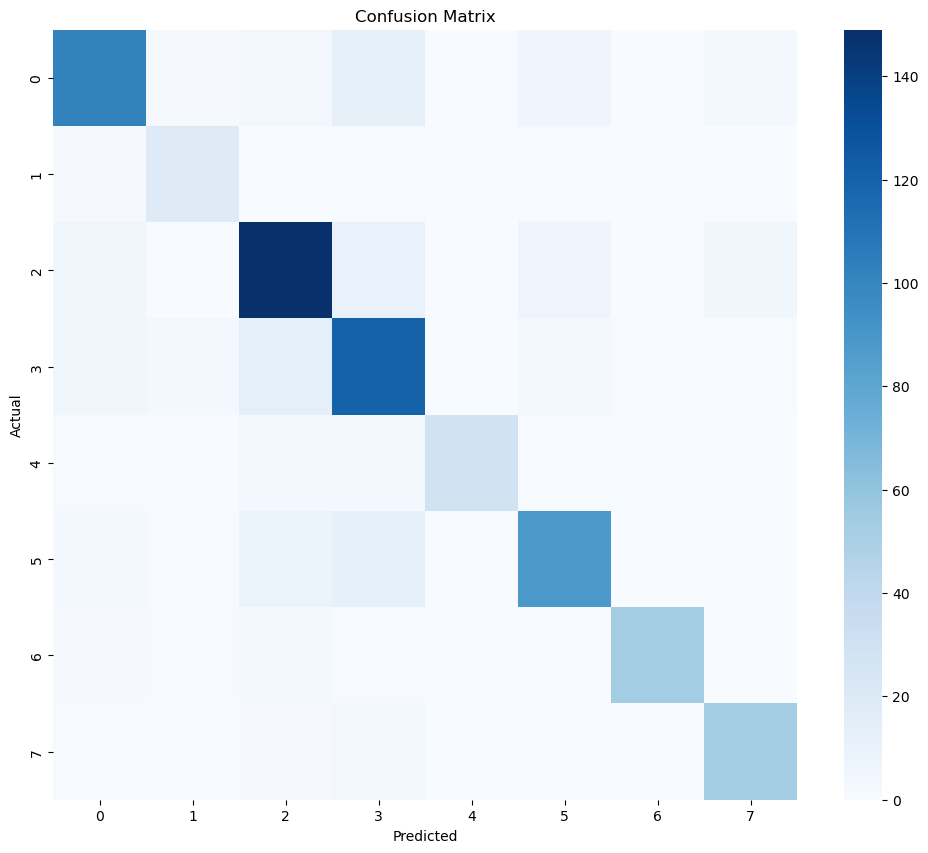

In [124]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12,10))
sns.heatmap(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [126]:
new_ticket = ["Users cannot login after password reset"]

prediction = model.predict(new_ticket)
print("Predicted Topic:", prediction[0])

Predicted Topic: Access


In [132]:
new_ticket = ["Users cannot connect to VPN after update"]

prediction = model.predict(new_ticket)
print("Predicted Topic:", prediction[0])

Predicted Topic: Access


In [134]:
import joblib

joblib.dump(model, "ticket_model.pkl")

['ticket_model.pkl']